In [3]:
# Итак, что нужно сделать: 
# 1) у нас есть данные АА-теста с '2022-11-25' по '2022-12-01'. 

# 2) На каждой итерации вам нужно сформировать подвыборки без повторения в 500 юзеров из 2 и 3 экспериментальной группы. 
     

# 3) Провести сравнение этих подвыборок t-testом.

# 4)
# 1. Построить гистограмму распределения получившихся 10000 p-values.

# 2. Посчитать, какой процент p values оказался меньше либо равен 0.05

# 3. Написать вывод по проведенному АА-тесту, корректно ли работает наша система сплитования.

# 4. Пришлите ссылку на merge request c проведенным анализом.



In [2]:







#          Привет уважаемая команда! Сопроводительная заметка пояснение:
         
#       Здесь я ввел свои дополнительные элементы в дизайн,  что бы показать, найденую и усвоеную мной 
#     посследовательно проверок и рассуждений в ЭТОМ виде вопроса. Если у вас другое опытное мнение, пожалуйста, 
#     дайте обратную связь, она будет очень ценной для меня!

#     Как и ранее, для вас ( и по своей привычке ),я все подробно описываю, читайте неторопливо, я старался.
#         Моя цель ,по прежнему, донести способ рассуждения, а не короткий вывод.  Если есть ошибки в расчетах 
#         или оценках показатели, прошу учитывать новизну материала, не ругать, и просто дать разъяснения.

#     Исторически сложилось , что в первую очередь, меня заботила наука принятия решения в условиях извечной 
#     асимметрии информации и собственной «возможности ошибиться». Поэтому стараюст понимть и контролировать то, 
#     КАКИЕ ошибки и КОГДА я допускаю. Мне хочется верить, это важнейший навык для исследователя.	
#     Помогают мне в  этом, мои товарищи Канеман, Тверски, Талеб, еще с 10х годов. 
#     Сейчас более плотно знакомлюсь со статистикой и визуализацией. 

   

                                            
                                            импортирую и подключаюсь

In [3]:
import pandas as pd
import numpy as np
import pandahouse
import matplotlib.pyplot as plt
import scipy.stats as stats

connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20221220'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') AS likes,
    sum(action = 'view') AS views,
    likes/views AS ctr
FROM {db}.feed_actions 
WHERE toDate(time) >= '2022-11-25' AND toDate(time) <= '2022-12-01'
    AND exp_group IN (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

#сомтрим количество наблюдений в группах
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


In [4]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


                                        визуалочка частотости значений ctr обоих групп

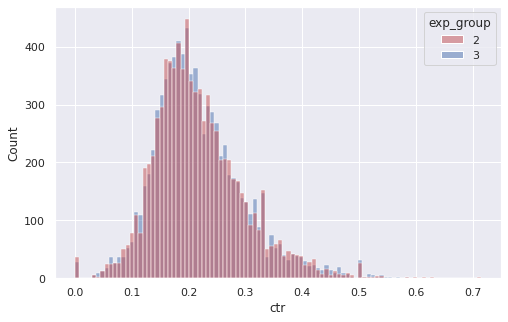

In [5]:
# смотрим частоту! выпадания величин ctr  2 b 3  группы. Смотрим изз рапсределение.
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

                            проверка допущений для Т теста и АА теста

среднее занчение 2йгруппы p value is 2.97422507873153e-08
среднее занчение 3йгруппы p value is 2.6010815829743087e-08
 95 процентиль полученных занчений p value is 7.170866460626253e-08
 95 процентиль полученных занчений p value is 1.3966967813416875e-07


((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

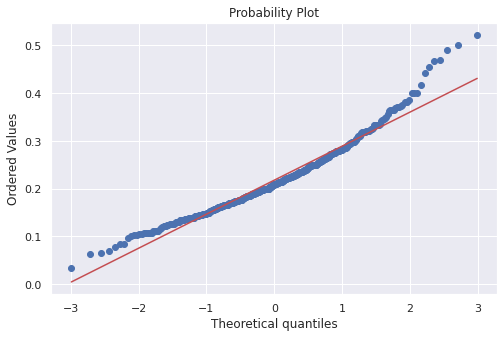

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

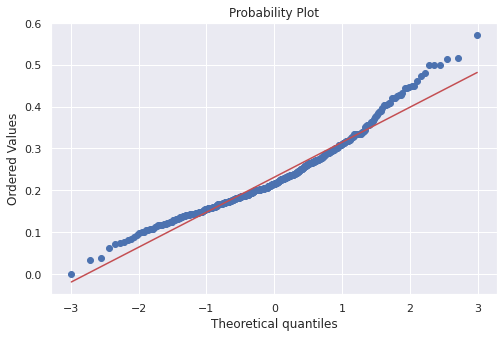

In [6]:
# ПРОВЕРКА допущений



# 1) ctr сам шкала отношений, значит можно и параметрику

# 2)  проверил сначала нормальность распределений, через sample. Не обращаю, что уже определеили способ
# АА теста, все таки должен исследовать данные, это основа основ

trash_2 = []
for i in range(100):
    p2 = stats.shapiro(df.query('exp_group ==2').ctr.sample(500, replace =False))[1]
    trash_2.append(p2)

trash_3 = []
for i in range(100):
    p3 = stats.shapiro(df.query('exp_group ==3').ctr.sample(500, replace =False))[1]
    trash_3.append(p3)
    
print(f'среднее занчение 2йгруппы p value is {np.mean(trash_2)}')
print(f'среднее занчение 3йгруппы p value is {np.mean(trash_3)}')


print(f' 95 процентиль полученных занчений p value is {np.quantile(trash_2, 0.95)}')
print(f' 95 процентиль полученных занчений p value is {np.quantile(trash_3, 0.95)}')

# ???
# ИТОГО срденее значние и 95 процентиль  - все p МЕНЬШЕ A , при sample size 500(а мы знаем,
# что тут есть зависимость)
#  А ВНАШЕМ СЛУЧАЕ - случайная величина "X" из 500 наблюдений СЛЙЧАЙНО взятых из 
#         указанных выборок распределена НЕ нормально.
#  Но  по практическому наблюдению Толи, все равно можно исопльзовать т тест из за ЦПТ.
# А выборка у нас большая.
        
# ПОМНИМ    
# Суть ЦПТ заключается , чем больше объем выборки,
# тем сильнее выборочное среднее будет стремиться к нормальному распределению.
# И  можем пользоваться критерием Стьюдента, даже если знаем, что ГС имеет распределение 
# отличное от нормального.
# НО помним, что центральная предельная теорема работает только для выборочного среднего, 
# а не для выборочной дисперсии, например.
    
    
# 2.1) qq plot посмотрим
import pylab 
import scipy.stats as stats

stats.probplot(df.query('exp_group ==2').ctr.sample(500, replace =False), dist="norm", plot=pylab)
pylab.show()     

stats.probplot(df.query('exp_group ==3').ctr.sample(500, replace =False), dist="norm", plot=pylab)
pylab.show()     

# ИТОГО на текущи сэмплах подтверждается та ненорм рапсределений

In [7]:
# 3) гомогенность
# Применяя Т-критерий Стьюдента нужно помнить о:
# Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий)

# Проверить можно с помощью критерия Левена и критерия Фишера .
    
# левена
# Тест Левена используется для определения того, имеют ли две или более группы одинаковые отклонения. 
# Он широко используется, потому что многие статистические тесты предполагают, 
# что группы имеют одинаковую дисперсию, а тест Левена позволяет определить,
# выполняется ли это предположение.
stats.levene(df.query('exp_group ==2').ctr, df.query('exp_group ==3').ctr)
# ИТОГО, причин отклонить Нулевую пока что не наблюдаем. Равные дисперсии.

LeveneResult(statistic=0.07008986609972037, pvalue=0.7912091809509416)

In [14]:
# 4) ДИ выборок,т тест
# !  Провести сравнение этих подвыборок t-testом.  Так как в задании предложено т тестом, то вспоминаю
# что такое т тест , это статистика, получаючающаяся из выборочных знаечний + колл степеней совбодны. Раз говорим
# о выбоорочных знаечниях, говорим о множестве выборок, у каждой выборки есть своя средняя, но т.к выборки не могут
# чстно  отображать variance генеральной совкупности, то мы помним,что 1) средняя всех средних это приближенный 
# лценщик 2) что бы проконтроливать достоверность зоны нахождения оценочной среней(не хочу точечню оценку),я 
# также оцениваю se каждой из выборок, что в итоге узнать значения se и получить некий Дов ИНтревал для Оценочной
# Средней (средней средних)

sample_size = 500 
group_std = []
group_se = []
group_mean = []
for i in range(500):
    sample_real = df.query('exp_group == [2,3]').sample(500, replace = False).ctr

    
    sample_mean_real = sample_real.mean()  #For each sample CALCULATE OWN MEAM AND STD!
    samle_std_real = sample_real.std()
    
    se_real = samle_std_real/sample_size**0.5   #iinstead Sigma/n**0.5 indicate EACH samle_std_real
                                #which can  consider as  Sigma of Population for each separate Sample !!!!
    
    group_mean.append(sample_mean_real)
    group_std.append(samle_std_real)
    group_se.append(se_real)

#затупил - есть в review урока, почта  
# ci_dw, ci_up = np.mean(group_mean)-(np.std(group_std)*np.mean(group_se)), np.mean(group_mean)+(np.std(group_std)*np.mean(group_se)) 
print(f' средняя выборочных средняя выборок {np.mean(group_mean)}, нижн ДИ {ci_dw}, верхн ДИ{ci_up}')

# 1) по таблице с учетом ст свободы и Альфа 05 взял 1,96 https://www.scribbr.com/statistics/students-t-table/
# 2) a/2*se +- mean 
# https://cran.r-project.org/web/packages/distributions3/vignettes/one-sample-t-confidence-interval.html
# https://www.scribbr.com/frequently-asked-questions/calculate-confidence-interval-of-mean-critical-value-of-t/#:~:text=Find%20the%20critical%20value%20of,to%20calculate%20the%20lower%20limit.

ci_dw, ci_up = np.mean(group_mean) - (1.96/2)* np.mean(group_se), np.mean(group_mean) + (1.96/2)* np.mean(group_se)

 средняя выборочных средняя выборок 0.21853888067639765, нижн ДИ 0.21852241596967872, верхн ДИ0.21854871916417426


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9964179396629333, pvalue=0.32699745893478394)

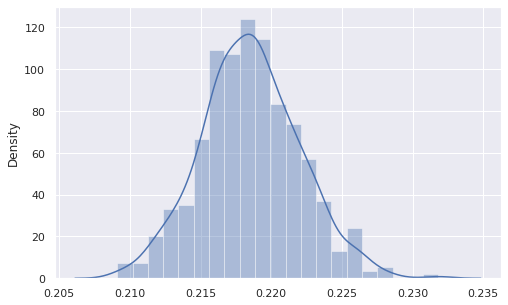

In [9]:
sns.distplot(group_mean)
stats.shapiro(group_mean)

                                                      
                                                      ЗАПУСК АА ТЕСТА

(array([24., 26., 17., 19., 14., 30., 24., 19., 17., 23., 13., 19., 22.,
        25., 19., 19., 29., 15., 17., 16., 19., 11., 21., 24., 21., 16.,
        26., 21., 12., 24., 15., 22., 17., 12., 18., 18., 22., 24., 22.,
        18., 25., 18., 20., 19., 23., 25., 22., 15., 21., 22.]),
 array([4.68905419e-04, 2.04590034e-02, 4.04491014e-02, 6.04391994e-02,
        8.04292973e-02, 1.00419395e-01, 1.20409493e-01, 1.40399591e-01,
        1.60389689e-01, 1.80379787e-01, 2.00369885e-01, 2.20359983e-01,
        2.40350081e-01, 2.60340179e-01, 2.80330277e-01, 3.00320375e-01,
        3.20310473e-01, 3.40300571e-01, 3.60290669e-01, 3.80280767e-01,
        4.00270865e-01, 4.20260963e-01, 4.40251061e-01, 4.60241159e-01,
        4.80231257e-01, 5.00221355e-01, 5.20211453e-01, 5.40201551e-01,
        5.60191649e-01, 5.80181747e-01, 6.00171845e-01, 6.20161943e-01,
        6.40152041e-01, 6.60142139e-01, 6.80132237e-01, 7.00122335e-01,
        7.20112433e-01, 7.40102531e-01, 7.60092629e-01, 7.80082727e-

Text(0.5, 0, 'pvalues')

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'Histogram of ttest A/A simulations ')

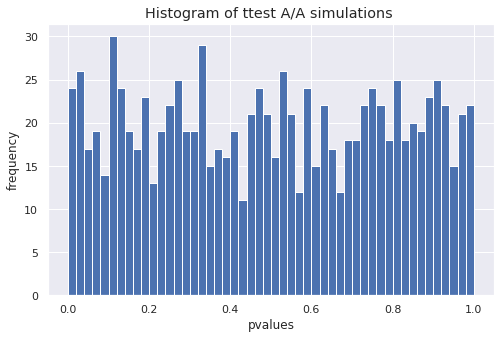

In [10]:
# делаем 10000  АА тестов, что бы не поймать чувствительность из за большого
# размера выборки, сэмплируем.
# t test,потому что величины, континуус, или приближены к норм рапсределению
# здесь ВТСАВЬ ПРОВЕРКУ ДОПУЩЕИЯМ
import matplotlib.pyplot as plt
import scipy.stats as stats

simulations = 1000
n_s = 500
res = []



# Запуск симуляций A/A теста
for i in range(simulations):
    gr2 = df.query('exp_group == 2').sample(n_s, replace = False).ctr
    gr3 = df.query('exp_group == 3').sample(n_s, replace = False).ctr
    res.append(stats.ttest_ind(gr2, gr3, equal_var = False)[1]) 

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
procentile_significant_pvalue = sum(np.array(res) <0.05) / simulations

In [11]:
#                                 ПРЕДВАРИТЕЛЬНЫЙ ВЫВОД

#     ПРИЧИНА АА теста.

# Причина 1

#  Делаем, что бы убедиться в корректности выбранных данных и совместимости с  стат критерием. ЧТо бы в
# дальнейшем получить более достоверные результат АБ теста, который  нам и будет важен.


# Причина 2. 

# так же,как я понимаю , помимо верности разбития выборок - мы проверяем стат критерий на верность работы с данными
# Нулевой гипотезы  -   Мы уже намеренно хотим допустить 5% колл ошбок соотвествующее длительности эксперемента/
# /рамеру выборки ,для того, что ТОЧНО значть, что  результаты БУДУЩЕГО БА ТЕСТА будут иметь 
# ТОЧНЫЙ расчет с (95%) значимотьб(5%альфа) ! 

# 1) А НЕ  с заывышенной альфой(более короткий эксп /мньшая выборка)
# 2) А НЕ с заниженной альфой (более длинны/большая выборка) + увеличивается ошибка 2 рода -  ИБО ПАДАЕТ МОЩНОСТЬ!

# ИБО они находятся на интегр приямой = ошиб 1рода + 95ДИ
#                                       ошиб 2 рода + 80% мощность!!
#                                                                  при изменении разм выборки,это все меняется!



#  Причина 3

# Дизайн для АА теста мой:
# 1)поставили гипотезу
# 2) выбрали меттрику
# 3) определяем стаистику для тестирования и соотвествию данных, математическим допущениям 
# 4) проверяем совместимость данных/статистики через АА тест
#   - чтоб не запароть, верно бьем на группы 
#   - смотрим получения значения и думаем удалось ли получить: 

#  а)Разбиение было случайным
#  б)У каждого пользователя в течение эксперимента группа не менялась (отсувие зависимости,
#  если в тесте должны присуствовать независ данные. А то изменяется колл факторов влияющих
#  на экспремент, а это уже другие модели)
#  в)Способ разбиения должен быть детерминированным (чтобы можно было, если нужно, в точности повторить разбиение)
#  г)нужно ктсати еще соблюсти рпезентативость к ГС


#  В ДИЗАЙНЕ ВЫБРАНА СИСТЕМА ХЕШ СПЛИТОВАНИЯ, КОТОРОЙ И  ВОСПОЛЬЗОВАЛИСЬ

# Удобно в этом плане, метод Хеширования,который был исопльзован, в противном случае бы
# пришлось, проводить сравнение на повторяющиеся значения id в обоих сплит выборках.
#  Любые id,что к нам пришли, через хеш, гарантируют, что получившиеся группы будут случайны и приблизительно одинакового размера.
#  После раздела юзеров , полезно удостовериться, что наша система корректно бьет пользователей на группы, то есть размеры групп примерно одинаковые (для соотвествия допущениям статистики) и показатели в них сами по себе не различаются (предполагаем, что они взятые из одного рапсределения этого показателя).


# Причина 4

#  Т ТЕСТ ПОДХОДИТ КАК СТАТИСТИЧЕСКИЙ ИНСТРУМЕНТ ОЦЕНКИ ЗНАЧЕНИЙ
# По причине допущений,которые мы проверили выше. 
# 1)Дисперсии одинаковы.
# 2)Расперделения не нормальноные, но мы оцениваем метрику положения(среднюю) и исопльзуем
# преимущество ПЦТ в этом случае.
# 3) Доверительный Интервал ,позволил нам понять,что елси мы наблюдаем по исходу эксперемента
# значения х в пределах ДИ контрольной группы, то с веротяность 95%, оно не будет стат значимым,исходя из ЭТОГО аа теста. Подумай об mde заранее .


#  ВИД САМОЙ ГИСТОГРАММЫ p value АА теста говорит, о некой равномерности частнотни и отсутсвия зависимых значений(повторяющихся id) в группах сплита 2 и 3 (какя понял).





# ИТОГО
#     Соблюдается не превышающая доля ошибок 1 рода, на данныз взятых из заведеомо одинковой совокупности. Классический статистический тест при правильном применении (например z-тест, t-тест) гарантирует, что количество ложных срабатываний (FPR или ошибок первого рода) не превышает Альфа ( 5%). Это означает, что при отсутствии разницы между экспериментальной и контрольной группой тест будет показывать значимое отличие не более чем в 5% случаев.
    
#     Размер выбоки подходит для установленной мощности и ошибки 1рода (хотя не известна mde которую бы хотели увидеть). Сами тип данных (ctr) так же подходят для выборанного теста.
# Количество ложноположительных случаев не превышает альфа.
    
# Такому объему выборки+тест+тип данных, можно доверить будущий АБ тест и с более высокой
# вероятностью получить достоверные результаты(не важно значимыми они будут или нет, но
# как раз, более достоверными)
    


In [12]:
# отдельно,причина АА теста из лекции

# 1) Сравнивая две группы друг с другом в эксперименте, мы хотим чтобы они отличались друг от
# друга только нашим воздействием в рамках теста (в нашем случае – алгоритмом
# рекомендаций), а все остальное в группах должно быть одинаковым.\

# 2) Например, чтобы не
# получилось, что в группе А больше пользователей из Москвы, а в группе В — пользователей
# из регионов,

# 3) или в группе А больше пользователей, которые пользуются сервисом в будние
# дни, а в группе В — тех, которые больше пользуются сервисом в выходные. 

# 4) Говоря умными
# словами, мы хотим, чтобы группы были статистически эквивалентны.

# 5) Кроме того, мы хотим,
# чтобы показатели группы отражали показатели в генеральной совокупности. То есть мы
# хотим провести тест на маленькой группе пользователей, но так, чтобы полученные выводы
# потом можно было распространить «на всех наших пользователей»

# 6) Про неизменность группы
# Одно из наших основных предположений в том, что группы отличаются друг от друга только
# алгоритмом рекомендаций. Если группа на протяжении теста сохраняться не будет,
# получится, что часть пользователей видела и тот алгоритм рекомендаций, и другой, что
# обычно плохо. Более того — нельзя просто так взять и «выкинуть» этих пользователей, а
# последующий анализ проводить без них, это может испортить выполнение пункта
# про случайность. То есть результат у нас будет, а раскатить его на всех потом будет нельзя

# 7) Про детерминированность
# Представим, что мы решили протестировать некоторую другую функциональность,
# например, появление дополнительной «карусели» с популярными «историями» (мы хотим,
# чтобы люди их смотрели). Но прямо сейчас уже идет тест с новыми алгоритмами
# рекомендаций. Мы не хотим, чтобы наши эксперименты пересеклись друг с другом. Для
# этого нам надо выделить группы под новый эксперимент таким образом, чтобы можно было
# полностью исключить тех, кто находится в эксперименте с рекомендациями. Без
# детерминированности это будет весьма затруднительно

# 8) А как нам разбить пользователей на группы? Стандартная техника для такого разбиения
# — хеширование с солью.
